# Analyze the Mined Twitter Data
Here some summaries of the mined Twitter data are presented along with visualizations.  Near the end, a brief effort is made to categorize tweets into related topics.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
df = pd.read_pickle('twitter_pickle')

In [3]:
df.head()

,text,user_lang,location,hashtags,retweet,n_retweet,n_followers,n_friends,name,coords,Cisco,CCNA,AWS,Sharepoint,linux,powershell,itil,sql,azure,ceh
0,RT @JessikaDommeUK: I am now available for #Di...,en,UK,"[{u'indices': [43, 54], u'text': u'DirectChat'...",False,0,12633,933,⭐️AdultworksFinest⭐️,None,False,False,False,False,False,False,False,False,False,False
1,yNewsbot: Bugtraq: #Cisco #Security #Advisory:...,en,tryingto #^fi~{|__#}%%*,"[{u'indices': [19, 25], u'text': u'Cisco'}, {u...",False,0,2636,1084,❌Siraj Solution❌,None,True,False,False,False,False,False,False,False,False,False
2,RT @mims: Amazon is going to compete directly ...,en,None,[],False,0,2624,4916,Leroy Wesley Annon,None,False,False,True,False,False,False,False,False,False,False
3,#Cisco Battles Shadow Broker Exploits. Read mo...,en,"San Mateo, CA","[{u'indices': [0, 6], u'text': u'Cisco'}]",False,0,86,2,Networking News,None,True,False,False,False,False,False,False,False,False,False
4,#Cisco Battles Shadow Broker Exploits. Read mo...,en,"San Mateo, CA","[{u'indices': [0, 6], u'text': u'Cisco'}]",False,0,20,2,Communication News,None,True,False,False,False,False,False,False,False,False,False


# Run Some Summary Statistics

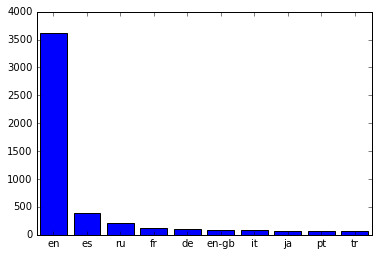

In [4]:
# How many tweets in each language?
df['user_lang'] = df['user_lang'].apply(lambda x: x.lower() if x else None)
lang_counts = pd.Series(df['user_lang']).value_counts()
languages = [lang for lang in lang_counts.index]
y_pos = np.arange(len(lang_counts))
plt.bar(y_pos, lang_counts.values, align = 'center');
plt.xticks(y_pos, languages);

# Show just the top 10
plt.xlim([-0.5, 9.5]);

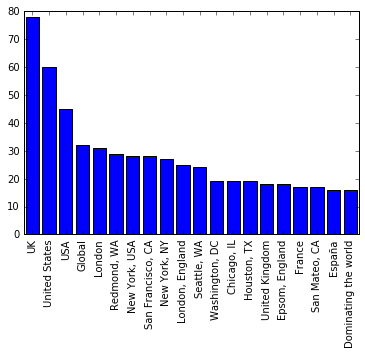

In [5]:
# How many unique locations?
location_counts = pd.Series(df['location']).value_counts()
locations = [loc for loc in location_counts.index]
y_pos = np.arange(len(location_counts))
plt.bar(y_pos, location_counts.values, align = 'center');
lc, ticks = plt.xticks(y_pos, locations, rotation = 'vertical');

# Show just the top 20
plt.xlim([-0.5, 19.5]);

Unfortunately `location` is a user-defined attribute, and the level of specificity varies a great deal between users--some giving the country (UK, USA), some the state (New York, USA), some the city (Redmond, WA), and some don't give locations at all (Dominating the world).  Another problem is that the same entity may be referred to differently by different users (United States, USA; United Kingdom, UK; Tokyo, 東京). It is also possible for users to simply lie about their locations.  Using Twitter's `coordinates` or `country` fields provides more rigorous data, but these fields are not mandatory, and have `None` values more often than not (as was seen with coordinates in the previous notebook).  To make use of the `location` field given here, a good deal more processing would be required. Though this is not done here, one can imagine a script that searches for state names, state abbreviations, "USA", "The United States", "The United States of America", etc., for example, and recategorizes all as simply `USA`, but a lot of similar such rules would have to be defined, and, I imagine, a fair amount of hand-checking to make sure all data were brought to a common standard.

In [6]:
print len(location_counts)
location_counts

1563


UK                                78
United States                     60
USA                               45
Global                            32
London                            31
Redmond, WA                       29
New York, USA                     28
San Francisco, CA                 28
New York, NY                      27
London, England                   25
Seattle, WA                       24
Washington, DC                    19
Chicago, IL                       19
Houston, TX                       19
United Kingdom                    18
Epsom, England                    18
France                            17
San Mateo, CA                     17
España                            16
Dominating the world              16
Boston, MA                        15
Manchester, UK                    14
Worldwide                         14
Germany                           14
India                             14
San Diego, CA                     14
48.75558712,2.33759696            13
D

In [7]:
# How many tweets were retweets?
# multiplying by 1 casts True/False values to 1/0 e.g.
sum(1 * (df['retweet'] == True)) # Zero!  

0

In [8]:
# The above code makes use of the fact that boolean values may be 
# coerced to 0/1 by multipylying by 1:
x = np.array([True, False, True, True, False, True, False, False])
print 'x:', x
print 'x == True:', x == True
print '1 * (x == True):', 1 * (x == True)
print 'No. True in x:', sum(1 * (x == True))

x: [ True False  True  True False  True False False]
x == True: [ True False  True  True False  True False False]
1 * (x == True): [1 0 1 1 0 1 0 0]
No. True in x: 4


In [9]:
# Total number of retweets (we already know the answer from above, but to 
# verify...
# sum() requires that we remove non-numeric values
sum(df['n_retweet'][~(np.isnan(df['n_retweet']))])

0.0

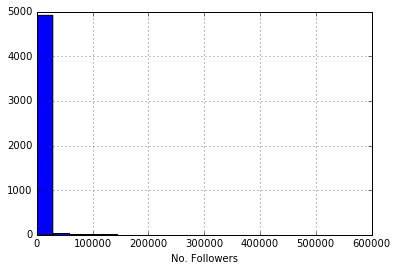

In [10]:
# What is the potenetial audience size of each tweet based on friends or 
# followers?
# We do these separately rather than summing, as there may be overlap in 
# the two groups
df['n_followers'].hist(bins = 20);
plt.xlabel('No. Followers');

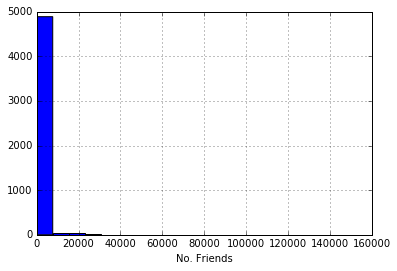

In [11]:
df['n_friends'].hist(bins = 20);
plt.xlabel('No. Friends');

These are both extremely skewed distributions, so at this level, we cannot make out much of the variation in data.  Zoom into the left-hand portion of the range.

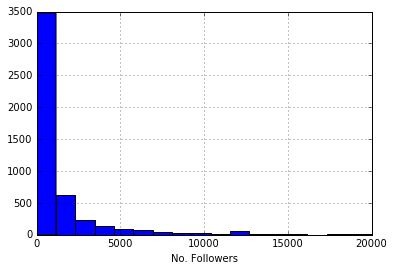

In [12]:
df['n_followers'].hist(bins = 500);
plt.xlim([0, 20000]);
plt.xlabel('No. Followers');

In [13]:
df.shape

(5007, 20)

We can see that most users (about 3500 of the 5007 in our data set, not accounting for repeats) have fewer than 1000 followers.  At the other extreme, though are users with nearly 160,000 followers.  For those users with such a potentially large audience, it may be worth investigating what they are posting about.

In [14]:
# First of all, who are the users with the most followers?
df['name'][df['n_followers'] > 100000]

150             SECURITY 411
654          Microsoft Azure
657        La Crónica de Hoy
1682                DocuSign
1892    Jema Gilsenan (Levi)
1941        AdultWork Models
2007            Eddy yquemas
2016        AdultWork Models
2069           Forbes México
2310         Antena San Luis
2313               Rackspace
2968    Kerri Walsh Jennings
3005      Swift!On!Security!
3031          Mikko Hypponen
3175      Swift!On!Security!
3684           MacGeneration
3706          Tweet Sugerido
3732               Rackspace
3825              Joe Moreno
4002     ❤❤ chrissie-milf ❤❤
4408               tinyBuild
4493                  NetApp
4856           Visual Studio
Name: name, dtype: object

If the names are to be believed, Microsoft Azure and Rackspace are both among the posters, which makes sense.  But, so are *AdultWork Models* and *❤❤ chrissie-milf ❤❤*... What on earth do they have to say about IT and IT education?

In [15]:
for (text, name, followers) in zip(
    df['text'], df['name'], df['n_followers']):

    if followers >= 100000:
        print '%s (%d followers):\n   %s\n\n' %(name, followers, text)

SECURITY 411 (202807 followers):
   HPE, Dell Introduce Systems, Services for Microsoft Azure https://t.co/aOS6e79s0w


Microsoft Azure (481218 followers):
   Dive deeper into #Azure with @Forbes' "A Close Look At #Microsoft's Azure Cloud, Part 2: The Offering." Read it now: https://t.co/SQMEQq005b


La Crónica de Hoy (118881 followers):
   Cisco invertirá 4 mil mdd en México https://t.co/4plVFspHiN https://t.co/rH4AUC7I6v


DocuSign (165019 followers):
   RT @mikekeen: Loving @DocuSign. After I moved onto Arch Linux on my machines, I really missed Apple's Preview app's signature features. Doc…


Jema Gilsenan (Levi) (100004 followers):
   I'm on cam now at #AdultWork.com. Come check me out! https://t.co/GlXXb4muPW


AdultWork Models (131672 followers):
   RT @JadeSamantha_JS: and I have free chat on.... https://t.co/YUBmaNC9Fy


Eddy yquemas (154665 followers):
   #vk NVIDIA Shows Off Their Latest Linux-Powered AI Car Demonstration: For those curious how NVIDIA's DRIVE PX... https://t

It is worth noting that for some users (notably *AdultWork Models* and *❤❤ chrissie-milf ❤❤*), the keywords that we originally used to mine tweeter do not appear *at all* in the text of their tweets.  Without digging into it further, my guess would be that a database is involved in generating tweets behind the scenes, and 'SQL' or similar is showing up somewhere else in the original twitter data as a result.  Because our dataframe has boolean values for each of our keywords, we can filter out those rows that have a `False` value for all keywords.

In [16]:
keywords = ['Cisco', 'CCNA', 'AWS', 'Sharepoint', 'linux', 'powershell', 
            'itil', 'sql', 'azure', 'ceh']
remove = []

for row in range(5007):
    n_false = 0
    for kw in keywords:
        if df.ix[row, kw] == False:
            n_false += 1
            if n_false == 10:
                remove.append(row)

In [17]:
# Examine to make sure code ran as expected
df.ix[remove, keywords]

,Cisco,CCNA,AWS,Sharepoint,linux,powershell,itil,sql,azure,ceh
0,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False
15,False,False,False,False,False,False,False,False,False,False
16,False,False,False,False,False,False,False,False,False,False
21,False,False,False,False,False,False,False,False,False,False
25,False,False,False,False,False,False,False,False,False,False
29,False,False,False,False,False,False,False,False,False,False
41,False,False,False,False,False,False,False,False,False,False
43,False,False,False,False,False,False,False,False,False,False
59,False,False,False,False,False,False,False,False,False,False


In [18]:
# Looks good-- Not one of these rows has a True value in any of these
# columns.  We lose a significant chunk of data though: 673 rows-- just 
# over 13%
df = df.drop(df.index[remove])

In [19]:
df.shape

(4334, 20)

In [20]:
# What are the counts of each of our keywords?
kw_counts = []

for kw in keywords:
    kw_counts.append(sum(1 * (df[kw] == True)))

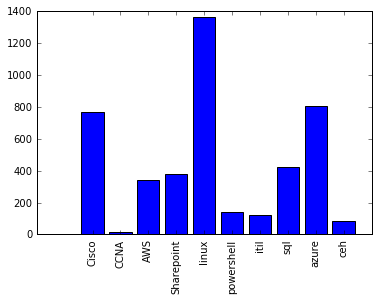

In [21]:
y_pos = np.arange(len(kw_counts))
plt.bar(y_pos, kw_counts, align = 'center');
lc, ticks = plt.xticks(y_pos, keywords, rotation = 'vertical');

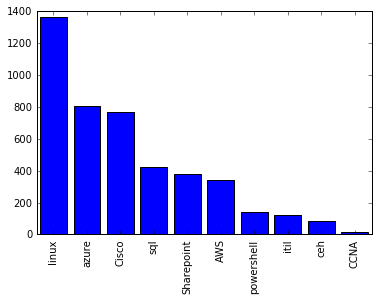

In [22]:
# Or to beautify the graph:
ordered_inds = np.argsort(kw_counts)
keywords = np.array(keywords)
kw_counts = np.array(kw_counts)

y_pos = np.arange(len(kw_counts))
plt.bar(y_pos, kw_counts[ordered_inds[::-1]], align = 'center');
lc, ticks = plt.xticks(
    y_pos, keywords[ordered_inds[::-1]], rotation = 'vertical');
plt.xlim([-0.5, 9.5]);

Do users who talk about different keywords have different numbers of followers? There are >1300 linux tweets *vs* only about 800 Azure and Cisco tweets, but how many followers are *seeing*, and potentially *being influenced by* each of these tweets?  

A quick way to do this is to just create new columns that multiply n_followers by the boolean (= 1 or 0) for each of the keywords:

In [23]:
for kw in keywords:
    df[kw + '_views'] = pd.to_numeric(df['n_followers'] * df[kw])

In [24]:
df.head()

,text,user_lang,location,hashtags,retweet,n_retweet,n_followers,n_friends,name,coords,...,Cisco_views,CCNA_views,AWS_views,Sharepoint_views,linux_views,powershell_views,itil_views,sql_views,azure_views,ceh_views
1,yNewsbot: Bugtraq: #Cisco #Security #Advisory:...,en,tryingto #^fi~{|__#}%%*,"[{u'indices': [19, 25], u'text': u'Cisco'}, {u...",False,0,2636,1084,❌Siraj Solution❌,None,...,2636,0,0,0,0,0,0,0,0,0
2,RT @mims: Amazon is going to compete directly ...,en,None,[],False,0,2624,4916,Leroy Wesley Annon,None,...,0,0,2624,0,0,0,0,0,0,0
3,#Cisco Battles Shadow Broker Exploits. Read mo...,en,"San Mateo, CA","[{u'indices': [0, 6], u'text': u'Cisco'}]",False,0,86,2,Networking News,None,...,86,0,0,0,0,0,0,0,0,0
4,#Cisco Battles Shadow Broker Exploits. Read mo...,en,"San Mateo, CA","[{u'indices': [0, 6], u'text': u'Cisco'}]",False,0,20,2,Communication News,None,...,20,0,0,0,0,0,0,0,0,0
5,yNewsbot: Bugtraq: #Cisco #Security #Advisory:...,en,tryingto #^fi~{|__#}%%*,"[{u'indices': [19, 25], u'text': u'Cisco'}, {u...",False,0,2636,1084,❌Siraj Solution❌,None,...,2636,0,0,0,0,0,0,0,0,0


Then proceed as before.

In [25]:
kw_views = [kw + '_views' for kw in keywords]

kw_view_counts = []
for kwv in kw_views:
    kw_view_counts.append(df[kwv].sum())

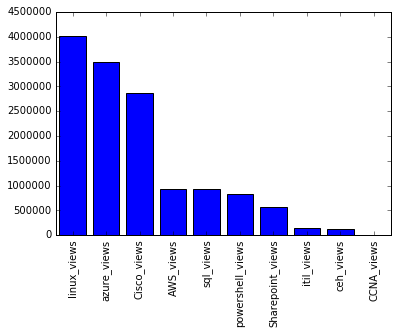

In [26]:
ordered_inds = np.argsort(kw_view_counts)
kw_views = np.array(kw_views)
kw_view_counts = np.array(kw_view_counts)

y_pos = np.arange(len(kw_view_counts))
plt.bar(y_pos, kw_view_counts[ordered_inds[::-1]], align = 'center');
lc, ticks = plt.xticks(y_pos, kw_views[ordered_inds[::-1]], rotation = 'vertical');
plt.xlim([-0.5, 9.5]);

The ordering has changed somewhat.  For example, although there were more SQL tweets than AWS tweets, the number of people who might have seen those tweets was roughly the same, with AWS coming out slightly ahead.  Likewise, although there were many fewer Powershell tweets than Sharepoint ones, the Powershell tweets reached a larger audience.  Furthermore, in terms of views, Linux remains in the lead but the gap between it and Azure and Cisco has closed.  Similarly, whereas Azure and Cisco were about even for number of tweets, Azure tweets had more (potential) viewers.

# Some Basic NLP
We know that the tweets in our data set are to some extent about our keywords, as those are what we mined for in the first place.  But, beyond that, what are these tweets talking about?  As a first approach, we can simply count the frequencies of different words to see which words are the most frequent. As is well known in NLP, the top of this list will be crowded with uniformative words like *the, of, I, this, is, etc...*, but we can examine the list for high-frequency content words as well.

In [27]:
word_counts = {}

for tweet in df['text']:
    if tweet == None:
        continue
    else:
        for word in tweet.lower().split():
            if word in word_counts:
                word_counts[word] += 1
            else:
                word_counts[word] = 1

In [28]:
threshold = 100

for w in sorted(word_counts, key = word_counts.get, reverse = True):
    if word_counts[w] > threshold:
        print "%15s: %d" %(w, word_counts[w])

             rt: 1512
            the: 980
             to: 842
          linux: 813
              -: 769
            for: 703
            and: 693
             in: 601
              a: 564
             of: 550
          cisco: 524
         #linux: 463
          azure: 445
             is: 392
             on: 382
           with: 381
      microsoft: 333
             at: 312
            sql: 299
      #msignite: 296
              i: 218
         #azure: 215
    #sharepoint: 214
          &amp;: 210
             de: 203
            you: 189
       software: 186
            now: 185
            ios: 185
            new: 179
          cloud: 163
             an: 161
           this: 157
           your: 155
           #aws: 155
            how: 149
           from: 148
             it: 146
         server: 146
             by: 141
             as: 136
        service: 135
              :: 135
            via: 130
       services: 130
           will: 129
            aws: 128
     sharepo

From the list of the most frequent words above, content words other than our keywords include:
* #msignite
* software
* cloud 
* server
* service(s)
* security and 
* available

I am not a Twitter user myself, but I presume the `rt` that tops the list stands for "retweet".  If so, it is interesting then that over a third of the data are retweets (rt), but that the original json file did not capture any of these in `retweeted` field.  Without further investigation, is unclear why this is, but something to flag.

# Text Classification
For the remainder of this notebook, I am repeating some of the work I recently did for an online machine learning class that has to do with Latent Dirichlet Allocation (LDA) for document classification.

My original homework can be found here with more detailed explanations:

https://github.com/damiansp/ML_Course/blob/master/clustering_retrieval/5_lda_blank.ipynb

This was done for the class: 

https://www.coursera.org/learn/ml-clustering-and-retrieval/home/welcome 

...as part of the ML Specialization taught through the University of Washington on Coursera: 

https://www.coursera.org/specializations/machine-learning

In [29]:
import graphlab as gl

A newer version of GraphLab Create (v2.1) is available! Your current version is v2.0.1.
You can use pip to upgrade the graphlab-create package. For more information see https://turi.com/products/create/upgrade.


In [30]:
# Convert Pandas Dataframe to and SFrame for use in graphlab
df2 = gl.SFrame(df)
df2 = df2.dropna(columns = 'text')

[INFO] graphlab.cython.cy_server: GraphLab Create v2.0.1 started. Logging: /tmp/graphlab_server_1475265697.log
INFO:graphlab.cython.cy_server:GraphLab Create v2.0.1 started. Logging: /tmp/graphlab_server_1475265697.log


This non-commercial license of GraphLab Create for academic use is assigned to damiansp@gmail.com and will expire on March 07, 2017.


In [31]:
twitter_docs = gl.text_analytics.count_words(df2['text'])

In [32]:
twitter_docs = twitter_docs.dict_trim_by_keys(
    gl.text_analytics.stopwords(), exclude = True)
print 'First tweet:\n', df2['text'][0], '\n\n'
print twitter_docs[0]

First tweet:
yNewsbot: Bugtraq: #Cisco #Security #Advisory: Cisco IOS XE Software NAT Denial of Service Vulnerability https://t.co/UUd7Iqs5hL/s/B7wy #... 


{'https://t.co/uud7iqs5hl/s/b7wy': 1, 'denial': 1, 'cisco': 1, 'ynewsbot:': 1, 'service': 1, 'bugtraq:': 1, '#advisory:': 1, 'vulnerability': 1, 'ios': 1, 'xe': 1, '#security': 1, 'nat': 1, '#...': 1, '#cisco': 1, 'software': 1}


Similarly to what was done above, this code converts each tweet to a dictionary of word counts, but removes common grammatical words like "of" and "the" ("stopwords")

In [45]:
# Run LDA model-- Although covered in the class, I do NOT implement my own
# code for LDA here. This is done by graphlab here.
topic_model = gl.topic_model.create(
    twitter_docs, num_topics = 10, num_iterations = 200)

Learning a topic model

Number of documents      4332

Vocabulary size     16094

Running collapsed Gibbs sampling

+-----------+---------------+----------------+-----------------+

| Iteration | Elapsed Time  | Tokens/Second  | Est. Perplexity |

+-----------+---------------+----------------+-----------------+

| 10        | 134.792ms     | 4.77245e+06    | 0               |

| 20        | 247.055ms     | 5.07902e+06    | 0               |

| 30        | 362.862ms     | 5.01171e+06    | 0               |

| 40        | 476.706ms     | 4.9805e+06     | 0               |

| 50        | 592.976ms     | 3.42392e+06    | 0               |

| 60        | 718.038ms     | 5.02151e+06    | 0               |

| 70        | 834.108ms     | 5.05534e+06    | 0               |

| 80        | 948.206ms     | 4.72256e+06    | 0               |

| 90        | 1.05s         | 4.96883e+06    | 0               |

| 100       | 1.16s         | 4.89947e+06    | 0               |

| 110       | 1.27s         | 4.66833e+06    | 0               |

| 120       | 1.38s         | 4.92668e+06    | 0               |

| 130       | 1.49s         | 5.13138e+06    | 0               |

| 140       | 1.59s         | 5.05429e+06    | 0               |

| 150       | 1.70s         | 4.98355e+06    | 0               |

| 160       | 1.82s         | 5.15905e+06    | 0               |

| 170       | 1.93s         | 4.97035e+06    | 0               |

| 180       | 2.04s         | 5.133e+06      | 0               |

| 190       | 2.15s         | 5.07902e+06    | 0               |

| 200       | 2.26s         | 5.02721e+06    | 0               |

+-----------+---------------+----------------+-----------------+

Without going into too much detail about it here, LDA attempts to find clusters of common documents (tweets in our case) by quantifying the affinity between each cluster/topic and each document, and the affinity between each topic and each individual word.  This is done iteratively, but ultimately and "topic" is the unknown set that we are trying to uncover. The number of topics to be found is a hyperparameter that we specify, and that will typically need tweeking to make sure that the assigned clusters/topics actually make sense.

Unfortunately, I have not been able to find a way to seed the algorithm, so, given the stochastic nature of the algorithm (Gibbs resampling), the output below will differ from run to run, but I comment on the output provided below.

In [46]:
# Look at top 10 words for each topic cluster:
[x['words'] for x in topic_model.get_topics(
        output_type = 'topic_words', num_words = 10)]

[['linux',
  '#aws',
  'rt',
  ':',
  'web',
  'security',
  '#news',
  'hosting',
  '\xe2\x80\x93',
  '#tech'],
 ['sql',
  'rt',
  'server',
  'aws',
  '&amp;',
  '-&gt;',
  'developer',
  'data',
  'ceh',
  '#jobs'],
 ['-', 'de', 'en', 'role', '#itil', '@cisco', '/', '#itsm', 'consultant', '|'],
 ['azure',
  'rt',
  '#azure',
  'cloud',
  'microsoft',
  'read',
  '@azure:',
  'stack',
  'find',
  'https://t.c\xe2\x80\xa6'],
 ['#linux',
  're:',
  'great',
  '[patch',
  'ubuntu',
  '24',
  '#powershell',
  '#ubuntu',
  'rt',
  'based'],
 ['rt',
  'windows',
  'preview',
  'amazon',
  'check',
  'development',
  'https://\xe2\x80\xa6',
  'booth',
  '10',
  'https://t.\xe2\x80\xa6'],
 ['rt',
  '#msignite',
  '#sharepoint',
  'sharepoint',
  '&amp;',
  '.',
  'team',
  '#office365',
  'session',
  'today'],
 ['cisco',
  'ios',
  'service',
  'software',
  'denial',
  'vulnerability',
  'xe',
  '#cisco',
  'vuln:',
  '#security'],
 ['microsoft',
  'services',
  'dell',
  'systems,',
  'so

The above output shows which words most contibuted to each of the clusters that LDA came up with.  In other words, these are topics or groupings of words that commonly co-occur or describe similar subjects.  Hence we might dub the last cluster the "Linux" cluster (or perhaps the "Spanish-language Linux" cluster, which includes tweets about Linux, mint (presumably Linux Mint distribution).

Similarly, the 8th cluster might be dubbed "security" and includes *cisco, security, vulnerability, and vuln:*.

The 2nd cluster includes *sql, server, developer, ceh and #jobs*, and might be dubbed the "developer", or "professional developer" cluster. 

(With the relatively small data set that went into this clustering, the clusters are somewhat fuzzy, and not all are clearly about a single topic, but considering the paucity of data, LDA does surprisingly well at finding topics.)

More generally though, this method can be used to help understand what topics are commonly occuring in the data set, and in a much larger dataset, can be used to quickly filter data. Also, much like Google's PageRank algorithm, LDA can be used to identify similar documents quickly.  This is done here using a nearest neighbors algorithm, that, given a tweet as input, will return other tweets deemed to be similar.

In [56]:
# Store the LDA scorings in our dataframe
df2['lda'] = topic_model.predict(twitter_docs, output_type = 'probability')

In [57]:
df2['key'] = range(df2.shape[0])
df2.head()

text,user_lang,location,hashtags,retweet,n_retweet
yNewsbot: Bugtraq: #Cisco#Security #Advisory: ...,en,tryingto #^fi~{|__#}%%*,"[{'indices': array('d',[19.0, 25.0]), 'text': ...",0,0.0
RT @mims: Amazon is goingto compete directly with ...,en,None,[],0,0.0
#Cisco Battles ShadowBroker Exploits. Read ...,en,"San Mateo, CA","[{'indices': array('d',[0.0, 6.0]), 'text': ...",0,0.0
#Cisco Battles ShadowBroker Exploits. Read ...,en,"San Mateo, CA","[{'indices': array('d',[0.0, 6.0]), 'text': ...",0,0.0
yNewsbot: Bugtraq: #Cisco#Security #Advisory: ...,en,tryingto #^fi~{|__#}%%*,"[{'indices': array('d',[19.0, 25.0]), 'text': ...",0,0.0
RT @entertainscape: Umm .. . SQL databases can ...,en,"Montreal, QC",[],0,0.0
Fui baixar o arquivo doorkuta (só Deus pode me ...,pt,saint bernard of field.,[],0,0.0
Download Large Files fromSharePoint Online ...,en,"Kolkata, India","[{'indices': array('d',[68.0, 79.0]), 'text': ...",0,0.0
#TengoUnAmigoQue le poneel * a todas sus ...,es,"Tepic, Mexico","[{'indices': array('d',[0.0, 16.0]), 'text': ...",0,0.0
Microsoft y Lenovoimpiden instalar Linux ...,es,Venezuela,[],0,0.0


In [58]:
# For all tweets, determine the neighbors (i.e., distances between it and 
# all other tweets)
model_lda_rep = gl.nearest_neighbors.create(df2, 
                                            label = 'key', 
                                            features = ['lda'], 
                                            method = 'brute_force', 
                                            distance = 'cosine')

Starting brute force nearest neighbors model training.

In [63]:
# Find the nearest neighbors to our tweet in the first record (index 0)
model_lda_rep.query(df2[df2['key'] == 0], label = 'key', k = 10)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.023084    | 1.077ms      |

| Done         |         | 100         | 3.759ms      |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,0,-2.22044604925e-16,1
0,35,0.000944487392574,2
0,2835,0.000944487392574,3
0,2974,0.000944487392574,4
0,2350,0.00129208094903,5
0,2233,0.00138599732639,6
0,2239,0.00138599732639,7
0,3343,0.00138599732639,8
0,3349,0.00138599732639,9
0,3165,0.00153986067102,10


So, for example, we can see that the relative to tweet 0 (the first row of our dataframe), tweet 35 is deemed the most similar, followed by tweet 2835 and 2974.  Compare:

In [84]:
df2['text'][0]

'yNewsbot: Bugtraq: #Cisco #Security #Advisory: Cisco IOS XE Software NAT Denial of Service Vulnerability https://t.co/UUd7Iqs5hL/s/B7wy #...'

In [85]:
df2['text'][35]

'Bugtraq: Cisco Security Advisory: Cisco IOS XE Software NAT Denial of Service Vulnerability https://t.co/dHCc4bQEmb'

In [86]:
df2['text'][2835]

'#ITSecureGamer Vuln: Cisco IOS and IOS XE Software CVE-2016-6393 Denial of Service\xe2\x80\xa6 https://t.co/mEZzxsEYXT Follow to learn more'

In [87]:
df2['text'][2974]

'Vuln: Multiple Cisco Products CVE-2016-6416 Denial of Service Vulnerability https://t.co/Ok7jQO9TGC\n\nMultiple Cisco Products CVE-2016-6416\xe2\x80\xa6'

And indeed! We can see that all of these tweets are very similar in content, having to do with a 'Denial of Service Vulnerability'.

In [79]:
# Find the nearest neighbors to our tweet in the first record (index 0)
model_lda_rep.query(df2[df2['key'] == 100], label = 'key', k = 10)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.023084    | 995us        |

| Done         |         | 100         | 3.589ms      |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
100,100,1.11022302463e-16,1
100,556,0.00138022775863,2
100,1572,0.00138022775863,3
100,1571,0.00143711679474,4
100,670,0.00236248454416,5
100,1233,0.00247015609873,6
100,1228,0.00274603677312,7
100,785,0.00277777777778,8
100,3695,0.00309666746622,9
100,3977,0.00312989813116,10


In [80]:
df2['text'][100]

'RT Linux Kernel Mail : https://t.co/EkS4AdeR9a'

In [81]:
df2['text'][556]

'RT Linux Memes : https://t.co/cLzGr1YDxM'

In [82]:
df2['text'][1572]

'RT Linux for ARM : https://t.co/vnGx1ULJP8'

In [83]:
df2['text'][1571]

'RT CentOS Linux : https://t.co/mEJR0w2qm0'

Also seems to make sense, though I warn that not all groupings are so immediately coherent.